# Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Reading data and saving it as csv file

In [2]:
credit_dataframe=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',delimiter=',',names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])












In [3]:
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
credit_dataframe = credit_dataframe.replace(['?'],np.nan)


In [5]:
credit_dataframe[['A2','A14']] = credit_dataframe[['A2','A14']].apply(pd.to_numeric)
#credit_dataframe[['14']] = credit_dataframe[['A14']].apply(pd.to_integer)

In [6]:
credit_dataframe.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
credit_dataframe.to_csv('dishimwe_project.csv', index=False)

# EDA

In [8]:
credit_dataframe.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [9]:
credit_dataframe.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [10]:
credit_dataframe.sample(100)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
99,a,28.50,1.000,u,g,q,v,1.000,t,t,2,t,g,167.0,500,-
107,a,25.00,11.000,y,p,aa,v,4.500,t,f,0,f,g,120.0,0,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+
56,b,23.17,0.000,u,g,cc,v,0.085,t,f,0,f,g,0.0,0,+
146,b,23.25,1.500,u,g,q,v,2.375,t,t,3,t,g,0.0,582,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,b,23.33,1.500,u,g,c,h,1.415,t,f,0,f,g,422.0,200,+
388,b,26.67,14.585,u,g,i,bb,0.000,f,f,0,t,g,178.0,0,-
473,b,19.17,4.000,y,p,i,v,1.000,f,f,0,t,g,360.0,1000,-
241,b,48.25,25.085,u,g,w,v,1.750,t,t,3,f,g,120.0,14,+


In [11]:
credit_dataframe.shape

(690, 16)

In [12]:
#checking missing and type of data , I am dealing with
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [13]:
#As you can see above A1,A2,A4,A5,A6,A7,A14 contain missing values

In [14]:
credit_dataframe.isnull().sum()# furthemore on checking missing values

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [15]:
credit_dataframe.sample(100).describe()# statistic summarry of my data

,A2,A3,A8,A11,A14,A15
count,100.000000,100.000000,100.000000,100.000000,97.000000,100.000000
mean,32.522300,4.197450,2.368100,2.710000,202.824742,774.500000
std,12.074511,4.911029,3.199607,4.542271,181.738767,2497.318269
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.810000,0.875000,0.250000,0.000000,80.000000,0.000000
50%,29.665000,2.270000,1.000000,0.000000,160.000000,1.000000
75%,41.145000,5.552500,3.500000,3.250000,280.000000,152.500000
max,68.670000,25.210000,15.000000,20.000000,980.000000,15108.000000


In [16]:
credit_dataframe.describe()# statistic summary expansion on all data


,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


<AxesSubplot:xlabel='A3'>

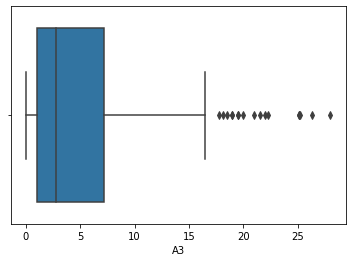

In [17]:


sns.boxplot(data=credit_dataframe,x=credit_dataframe['A3'])


<AxesSubplot:xlabel='A8'>

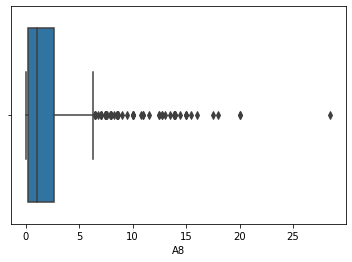

In [18]:
#checking of outliers using box plot 

sns.boxplot(data=credit_dataframe,x=credit_dataframe['A8'])

<AxesSubplot:xlabel='A11'>

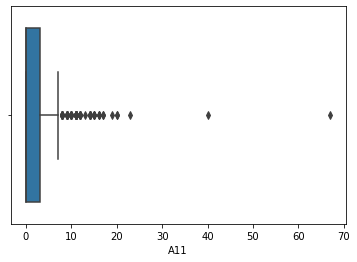

In [19]:
sns.boxplot(data=credit_dataframe,x=credit_dataframe['A11'])

<AxesSubplot:xlabel='A11'>

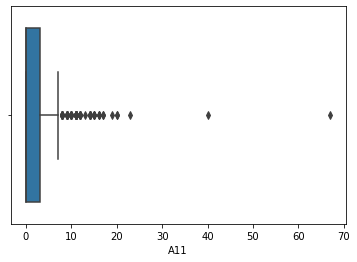

In [20]:
sns.boxplot(data=credit_dataframe,x=credit_dataframe['A11'])

<AxesSubplot:xlabel='A15'>

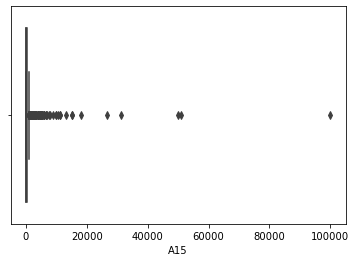

In [21]:
sns.boxplot(data=credit_dataframe,x=credit_dataframe['A15'])

<AxesSubplot:xlabel='A2'>

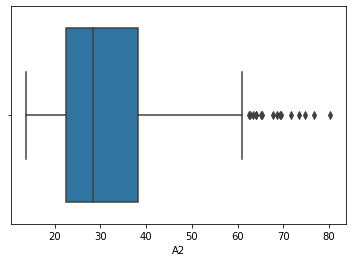

In [22]:
sns.boxplot(data=credit_dataframe,x=credit_dataframe['A2'])

<AxesSubplot:xlabel='A14'>

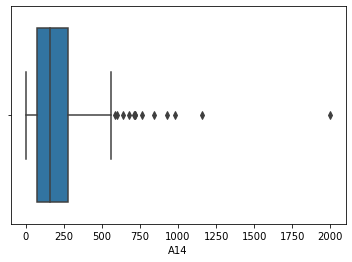

In [23]:
sns.boxplot(data=credit_dataframe,x=credit_dataframe['A14'])

In [24]:
#as you can see in above figure, all numerical columns contain outliers

# Visualization using Histogram and scatter plot

# Histogram

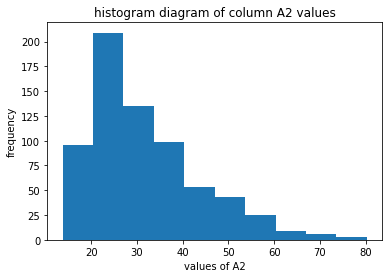

In [25]:
plt.title('histogram diagram of column A2 values')
plt.hist(credit_dataframe['A2'], bins=10)
plt.xlabel('values of A2')
plt.ylabel('frequency')
plt.show()

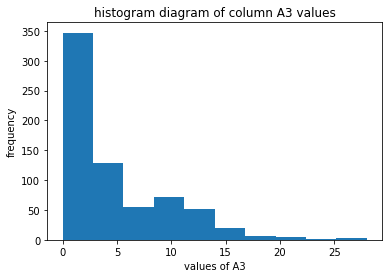

In [26]:
plt.title('histogram diagram of column A3 values')
plt.hist(credit_dataframe['A3'], bins=10)
plt.xlabel('values of A3')
plt.ylabel('frequency')
plt.show()

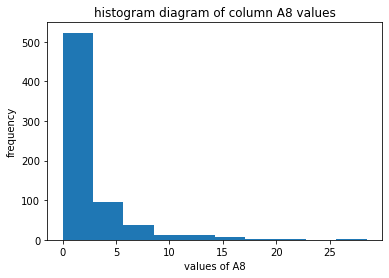

In [27]:
plt.title('histogram diagram of column A8 values')
plt.hist(credit_dataframe['A8'], bins=10)
plt.xlabel('values of A8')
plt.ylabel('frequency')
plt.show()

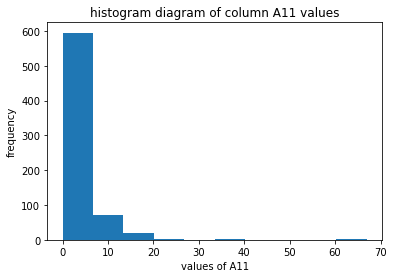

In [28]:

plt.title('histogram diagram of column A11 values')
plt.hist(credit_dataframe['A11'], bins=10)
plt.xlabel('values of A11')
plt.ylabel('frequency')
plt.show()

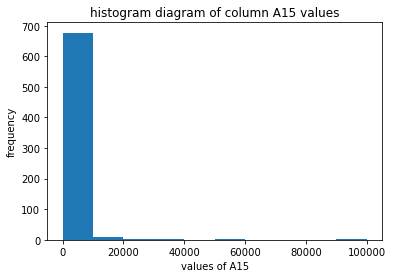

In [29]:
plt.title('histogram diagram of column A15 values')
plt.hist(credit_dataframe['A15'], bins=10)
plt.xlabel('values of A15')
plt.ylabel('frequency')
plt.show()

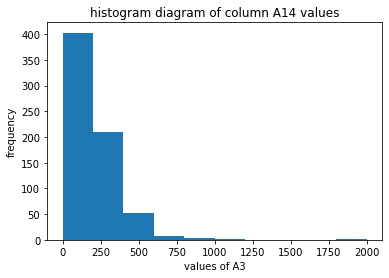

In [30]:
plt.title('histogram diagram of column A14 values')
plt.hist(credit_dataframe['A14'], bins=10)
plt.xlabel('values of A3')
plt.ylabel('frequency')
plt.show()

# Scatter plot

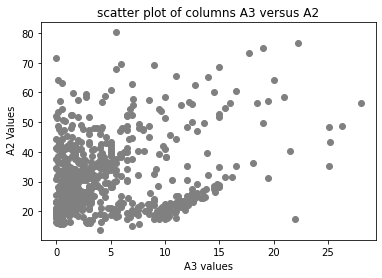

In [31]:
plt.title('scatter plot of columns A3 versus A2')
plt.xlabel('A3 values')
plt.ylabel(' A2 Values')
plt.scatter(credit_dataframe['A3'],credit_dataframe['A2'],color='grey')
plt.show()

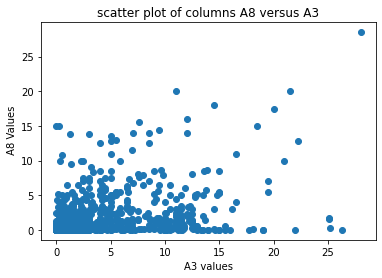

In [32]:

plt.title('scatter plot of columns A8 versus A3')
plt.xlabel('A3 values')
plt.ylabel(' A8 Values')
plt.scatter(credit_dataframe['A3'],credit_dataframe['A8'])

plt.show()

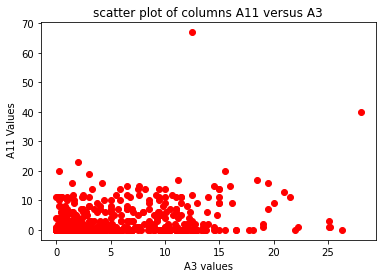

In [33]:
plt.title('scatter plot of columns A11 versus A3')
plt.xlabel('A3 values')
plt.ylabel(' A11 Values')
plt.scatter(credit_dataframe['A3'],credit_dataframe['A11'],color='red')
plt.show()

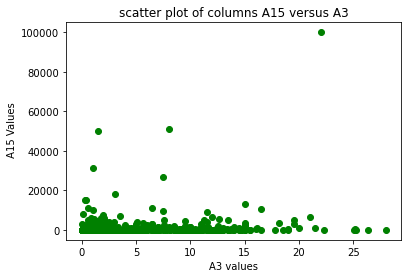

In [34]:
plt.title('scatter plot of columns A15 versus A3')
plt.xlabel('A3 values')
plt.ylabel(' A15 Values')
plt.scatter(credit_dataframe['A3'],credit_dataframe['A15'],color='green')
plt.show()

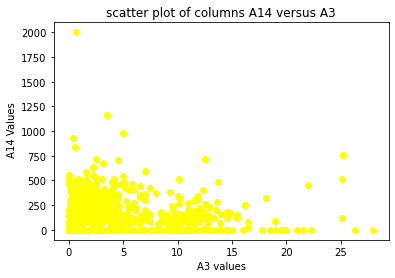

In [35]:
plt.title('scatter plot of columns A14 versus A3')
plt.xlabel('A3 values')
plt.ylabel(' A14 Values')
plt.scatter(credit_dataframe['A3'],credit_dataframe['A14'],color='yellow')
plt.show()

# Bivariate analysing using pairwise

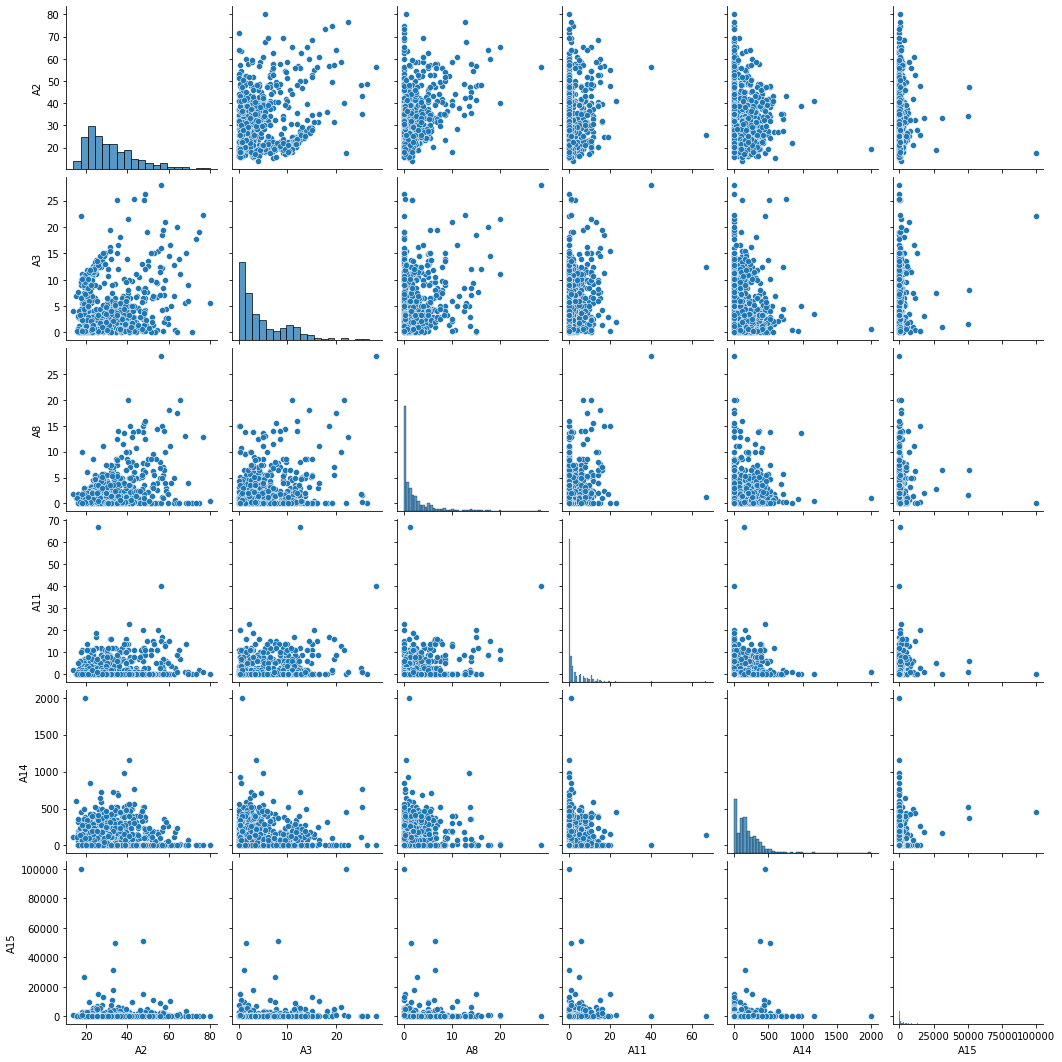

In [36]:
#Pairwise analysis
#sns.set(rc={"figure.figsize":(3, 4)})
sns.pairplot(data=credit_dataframe, vars=['A2','A3','A8','A11','A14','A15'])

# Preprocesing, Feature Selection and Engineering

In [37]:
#filling numerical columns using mean
credit_dataframe.fillna(credit_dataframe.mean(),inplace=True) 
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [38]:
# filling categorical columns with values that have most frequency in column or mode
for column in credit_dataframe:
    if credit_dataframe[column].dtype=='object':
        credit_dataframe= credit_dataframe.fillna(credit_dataframe[column].value_counts().index[0]) 
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [39]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
Quantile1_a2=credit_dataframe['A2'].quantile(0.25)
Quantile3_a2=credit_dataframe['A2'].quantile(0.75)
Inter_Quantile_Range_a2 =Quantile3_a2-Quantile1_a2
Lower_Whisker_a2 =Quantile1_a2 - 1.5*Inter_Quantile_Range_a2
Upper_Whisker_a2 = Quantile3_a2 + 1.5*Inter_Quantile_Range_a2
credit_dataframe1=credit_dataframe[credit_dataframe['A2']<=Upper_Whisker_a2]#removing outlier from my data
#check shape again of data after removing outlier
credit_dataframe1.shape

(672, 16)

In [40]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
Quantile1_a3=credit_dataframe1['A3'].quantile(0.25)
Quantile3_a3=credit_dataframe1['A3'].quantile(0.75)
Inter_Quantile_Range_a3=Quantile3_a3-Quantile1_a3
Lower_Whisker_a3 =Quantile1_a3 - 1.5*Inter_Quantile_Range_a3
Upper_Whisker_a3 = Quantile3_a3 + 1.5*Inter_Quantile_Range_a3
credit_dataframe2=credit_dataframe1[credit_dataframe1['A3']<=Upper_Whisker_a3]#removing outlier from my data
#check shape again of data after removing outlier
credit_dataframe2.shape

(657, 16)

In [41]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
#removing outlier from my data
Quantile1_a8=credit_dataframe2['A8'].quantile(0.25)
Quantile3_a8=credit_dataframe2['A8'].quantile(0.75)
Inter_Quantile_Range1=Quantile3_a8-Quantile1_a8
Lower_Whisker1 =Quantile1_a8 - 1.5*Inter_Quantile_Range1
Upper_Whisker1 = Quantile3_a8 + 1.5*Inter_Quantile_Range1
credit_dataframe3=credit_dataframe2[credit_dataframe2['A8']<=Upper_Whisker1]
#check shape again of data after removing outlier
credit_dataframe3.shape

(602, 16)

In [42]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
#removing outlier from my data
Quantile1_a11=credit_dataframe3['A11'].quantile(0.25)
Quantile3_a11=credit_dataframe3['A11'].quantile(0.75)
Inter_Quantile_Range2=Quantile3_a11-Quantile1_a11
Lower_Whisker_a11=Quantile1_a11 - 1.5*Inter_Quantile_Range2
Upper_Whisker_a11 = Quantile3_a11 + 1.5*Inter_Quantile_Range2
credit_dataframe4=credit_dataframe3[credit_dataframe3['A11']<=Upper_Whisker_a11]
#check shape again of data after removing outlier
credit_dataframe4.shape

(517, 16)

In [43]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
#removing outlier from my data
Quantile1_a14=credit_dataframe4['A3'].quantile(0.25)
Quantile3_a14=credit_dataframe4['A3'].quantile(0.75)
Inter_Quantile_Range_a14=Quantile3_a14-Quantile1_a14
Lower_Whisker_a14 =Quantile1_a14 - 1.5*Inter_Quantile_Range_a14
Upper_Whisker_a14 =Quantile3_a14 + 1.5*Inter_Quantile_Range_a14
credit_dataframe5=credit_dataframe4[credit_dataframe4['A3']<=Upper_Whisker_a14]
#check shape again of data after removing outlier
credit_dataframe5.shape

(492, 16)

In [44]:
#handling outlier
#outlier is value below  lower_whisker or above upper_whisker
#removing outlier from my data
Quantile1_a15=credit_dataframe5['A15'].quantile(0.25)
Quantile3_a15=credit_dataframe5['A15'].quantile(0.75)
Inter_Quantile_Range3=Quantile3_a15-Quantile1_a15
Lower_Whisker3 =Quantile1_a15 - 1.5*Inter_Quantile_Range3
Upper_Whisker3 = Quantile3_a15 + 1.5*Inter_Quantile_Range3
credit_dataframe6=credit_dataframe5[credit_dataframe5['A15']<=Upper_Whisker3]
#check shape again of data after removing outlier
credit_dataframe6.shape

(407, 16)

In [45]:
credit_dataframe6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 686
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      407 non-null    object 
 1   A2      407 non-null    float64
 2   A3      407 non-null    float64
 3   A4      407 non-null    object 
 4   A5      407 non-null    object 
 5   A6      407 non-null    object 
 6   A7      407 non-null    object 
 7   A8      407 non-null    float64
 8   A9      407 non-null    object 
 9   A10     407 non-null    object 
 10  A11     407 non-null    int64  
 11  A12     407 non-null    object 
 12  A13     407 non-null    object 
 13  A14     407 non-null    float64
 14  A15     407 non-null    int64  
 15  A16     407 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 54.1+ KB


In [46]:
# using one hot encoder to convert categorical data to numerical
credit_dataframe_converted=pd.get_dummies(credit_dataframe6 , columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16'],prefix=['A1','A4','A5','A6','A7','A9','A10','A12','A13','A16'])

In [47]:
credit_dataframe_converted.shape

(407, 49)

In [48]:
credit_dataframe_converted.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_b,A4_u,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0
5,32.08,4.000,2.50,0,360.0,0,0,1,0,1,...,1,1,0,0,1,1,0,0,1,0
8,54.42,0.500,3.96,0,180.0,314,0,1,0,0,...,1,1,0,1,0,1,0,0,1,0


In [49]:
#Scaling
X=credit_dataframe_converted.iloc[:,:47]
y=credit_dataframe_converted.iloc[:,47:50]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


# Model creation and evaluation:

In [50]:
#How many input features or independent variables
features=X_scaled.shape[1]
features

47

In [51]:

neural_network_model=MLPClassifier(hidden_layer_sizes=(100))

In [52]:
#cv=10 or number of fold

nn_Scores = cross_validate(neural_network_model, X_scaled, y, scoring = ['accuracy','f1_weighted'],cv=10)

scores = list(nn_Scores.keys())

accuracy_nn = nn_Scores[scores[2]].mean()
f1_score_nn = nn_Scores[scores[3]].mean()
#print(key)
print(f' NN: accuracy= {accuracy_nn}, f1-score = {f1_score_nn}')

 NN: accuracy= 0.7738414634146341, f1-score = 0.7846920858544444


In [54]:
neural_network_model1=MLPClassifier(hidden_layer_sizes=(100),max_iter = 5, warm_start = True, verbose = True)


In [55]:
search_space={
             'batch_size':[20,50,100,150,200],\
             'learning_rate':['constant','invscaling','adaptive'],\
             'activation':['identity','logistic','tanh','relu']
             }

In [56]:
gd_search=GridSearchCV(estimator=neural_network_model1, param_grid=search_space,\
                        cv=10, n_jobs=1,verbose=1,scoring='accuracy')

In [57]:
gd_search=gd_search.fit(X_scaled,y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Iteration 1, loss = 1.29481220
Iteration 2, loss = 0.93532709
Iteration 3, loss = 0.79224093
Iteration 4, loss = 0.71049995
Iteration 5, loss = 0.66261512
Iteration 1, loss = 1.48355500
Iteration 2, loss = 1.01237190
Iteration 3, loss = 0.79866287
Iteration 4, loss = 0.69785895
Iteration 5, loss = 0.64205952
Iteration 1, loss = 1.28418573
Iteration 2, loss = 0.98353477
Iteration 3, loss = 0.85344891
Iteration 4, loss = 0.77447029
Iteration 5, loss = 0.72933127
Iteration 1, loss = 1.40274325
Iteration 2, loss = 1.06818145
Iteration 3, loss = 0.92573742
Iteration 4, loss = 0.84364420
Iteration 5, loss = 0.78039376
Iteration 1, loss = 1.43771657
Iteration 2, loss = 1.07379144
Iteration 3, loss = 0.93335437
Iteration 4, loss = 0.86315177
Iteration 5, loss = 0.81401096
Iteration 1, loss = 1.50552366
Iteration 2, loss = 1.10936674
Iteration 3, loss = 0.93949648
Iteration 4, loss = 0.86595319
Iteration 5, loss = 0.81378164
Iterati

Iteration 2, loss = 1.41052912
Iteration 3, loss = 1.24576485
Iteration 4, loss = 1.14629334
Iteration 5, loss = 1.06567361
Iteration 1, loss = 1.26122663
Iteration 2, loss = 1.06196293
Iteration 3, loss = 0.94556896
Iteration 4, loss = 0.85871896
Iteration 5, loss = 0.80052889
Iteration 1, loss = 1.44093576
Iteration 2, loss = 1.18161961
Iteration 3, loss = 1.03190200
Iteration 4, loss = 0.93819861
Iteration 5, loss = 0.87995168
Iteration 1, loss = 1.61847633
Iteration 2, loss = 1.29257620
Iteration 3, loss = 1.10896311
Iteration 4, loss = 1.00772665
Iteration 5, loss = 0.94213993
Iteration 1, loss = 1.52286630
Iteration 2, loss = 1.34183327
Iteration 3, loss = 1.20696648
Iteration 4, loss = 1.11062688
Iteration 5, loss = 1.03493003
Iteration 1, loss = 1.41707388
Iteration 2, loss = 1.24443094
Iteration 3, loss = 1.12273440
Iteration 4, loss = 1.03747532
Iteration 5, loss = 0.96746047
Iteration 1, loss = 1.38045424
Iteration 2, loss = 1.22285646
Iteration 3, loss = 1.11433777
Iteratio

Iteration 1, loss = 1.86711847
Iteration 2, loss = 1.67520464
Iteration 3, loss = 1.52271285
Iteration 4, loss = 1.40287076
Iteration 5, loss = 1.30435047
Iteration 1, loss = 1.39155677
Iteration 2, loss = 1.26522804
Iteration 3, loss = 1.16927814
Iteration 4, loss = 1.09528046
Iteration 5, loss = 1.03737018
Iteration 1, loss = 1.59179985
Iteration 2, loss = 1.44596645
Iteration 3, loss = 1.33838673
Iteration 4, loss = 1.25530769
Iteration 5, loss = 1.18829390
Iteration 1, loss = 1.51908848
Iteration 2, loss = 1.37640062
Iteration 3, loss = 1.26868041
Iteration 4, loss = 1.18303221
Iteration 5, loss = 1.11608391
Iteration 1, loss = 1.71846470
Iteration 2, loss = 1.55337234
Iteration 3, loss = 1.41874161
Iteration 4, loss = 1.30447768
Iteration 5, loss = 1.21203611
Iteration 1, loss = 1.60085944
Iteration 2, loss = 1.44707566
Iteration 3, loss = 1.32841551
Iteration 4, loss = 1.22421388
Iteration 5, loss = 1.15192868
Iteration 1, loss = 1.53177983
Iteration 2, loss = 1.37440201
Iteratio

Iteration 4, loss = 1.01830020
Iteration 5, loss = 0.97701958
Iteration 1, loss = 1.24322961
Iteration 2, loss = 1.00482956
Iteration 3, loss = 0.95019373
Iteration 4, loss = 0.90968641
Iteration 5, loss = 0.86944018
Iteration 1, loss = 1.24708060
Iteration 2, loss = 1.05580925
Iteration 3, loss = 0.98815358
Iteration 4, loss = 0.94624815
Iteration 5, loss = 0.90343338
Iteration 1, loss = 1.33520586
Iteration 2, loss = 1.05840479
Iteration 3, loss = 0.99074557
Iteration 4, loss = 0.95059026
Iteration 5, loss = 0.91612158
Iteration 1, loss = 1.25329639
Iteration 2, loss = 1.11010335
Iteration 3, loss = 1.05351490
Iteration 4, loss = 1.00157670
Iteration 5, loss = 0.95556857
Iteration 1, loss = 1.29327053
Iteration 2, loss = 1.11842290
Iteration 3, loss = 1.06590530
Iteration 4, loss = 1.01771717
Iteration 5, loss = 0.97390600
Iteration 1, loss = 1.21217125
Iteration 2, loss = 1.11137184
Iteration 3, loss = 1.05812471
Iteration 4, loss = 1.01450849
Iteration 5, loss = 0.96628172
Iteratio

Iteration 2, loss = 1.10497868
Iteration 3, loss = 1.07003149
Iteration 4, loss = 1.04647920
Iteration 5, loss = 1.03152641
Iteration 1, loss = 1.69876682
Iteration 2, loss = 1.54896865
Iteration 3, loss = 1.42107456
Iteration 4, loss = 1.31496428
Iteration 5, loss = 1.23507980
Iteration 1, loss = 1.68460113
Iteration 2, loss = 1.54677225
Iteration 3, loss = 1.42533425
Iteration 4, loss = 1.33276646
Iteration 5, loss = 1.25530518
Iteration 1, loss = 1.57591649
Iteration 2, loss = 1.46533639
Iteration 3, loss = 1.37041409
Iteration 4, loss = 1.29458323
Iteration 5, loss = 1.23855460
Iteration 1, loss = 1.25615996
Iteration 2, loss = 1.21311881
Iteration 3, loss = 1.18211765
Iteration 4, loss = 1.16322746
Iteration 5, loss = 1.14673510
Iteration 1, loss = 1.39277242
Iteration 2, loss = 1.27041551
Iteration 3, loss = 1.17426701
Iteration 4, loss = 1.10085925
Iteration 5, loss = 1.04790509
Iteration 1, loss = 1.45064302
Iteration 2, loss = 1.34144206
Iteration 3, loss = 1.25965306
Iteratio

Iteration 2, loss = 1.23956467
Iteration 3, loss = 1.20491071
Iteration 4, loss = 1.17901684
Iteration 5, loss = 1.15319496
Iteration 1, loss = 1.59983419
Iteration 2, loss = 1.53045603
Iteration 3, loss = 1.46712243
Iteration 4, loss = 1.40814441
Iteration 5, loss = 1.35892624
Iteration 1, loss = 1.37686704
Iteration 2, loss = 1.31454561
Iteration 3, loss = 1.25894345
Iteration 4, loss = 1.21056291
Iteration 5, loss = 1.16580075
Iteration 1, loss = 1.51756462
Iteration 2, loss = 1.44698336
Iteration 3, loss = 1.38118415
Iteration 4, loss = 1.32258350
Iteration 5, loss = 1.27288575
Iteration 1, loss = 1.29671045
Iteration 2, loss = 1.24579730
Iteration 3, loss = 1.20227481
Iteration 4, loss = 1.16389832
Iteration 5, loss = 1.13041655
Iteration 1, loss = 1.34347921
Iteration 2, loss = 1.30115863
Iteration 3, loss = 1.26510135
Iteration 4, loss = 1.23354613
Iteration 5, loss = 1.20762268
Iteration 1, loss = 1.38544457
Iteration 2, loss = 1.33636605
Iteration 3, loss = 1.29167226
Iteratio

Iteration 1, loss = 1.55832721
Iteration 2, loss = 1.33121521
Iteration 3, loss = 1.18598109
Iteration 4, loss = 1.08376406
Iteration 5, loss = 1.00962275
Iteration 1, loss = 1.23345352
Iteration 2, loss = 1.07826432
Iteration 3, loss = 0.97176193
Iteration 4, loss = 0.88820760
Iteration 5, loss = 0.82344310
Iteration 1, loss = 1.38563549
Iteration 2, loss = 1.19906419
Iteration 3, loss = 1.07452323
Iteration 4, loss = 0.98928224
Iteration 5, loss = 0.92284772
Iteration 1, loss = 1.29939145
Iteration 2, loss = 1.13627466
Iteration 3, loss = 1.02970682
Iteration 4, loss = 0.94825782
Iteration 5, loss = 0.89042834
Iteration 1, loss = 1.50341324
Iteration 2, loss = 1.27171989
Iteration 3, loss = 1.10887617
Iteration 4, loss = 0.99235672
Iteration 5, loss = 0.90520726
Iteration 1, loss = 1.19511388
Iteration 2, loss = 1.03885194
Iteration 3, loss = 0.92460473
Iteration 4, loss = 0.84186329
Iteration 5, loss = 0.77805425
Iteration 1, loss = 1.34582874
Iteration 2, loss = 1.15679635
Iteratio

Iteration 4, loss = 1.08034719
Iteration 5, loss = 1.02894903
Iteration 1, loss = 1.49377755
Iteration 2, loss = 1.39504837
Iteration 3, loss = 1.31602689
Iteration 4, loss = 1.24820822
Iteration 5, loss = 1.19030489
Iteration 1, loss = 1.52763954
Iteration 2, loss = 1.42772698
Iteration 3, loss = 1.33905416
Iteration 4, loss = 1.26891989
Iteration 5, loss = 1.20201605
Iteration 1, loss = 1.50210950
Iteration 2, loss = 1.40234074
Iteration 3, loss = 1.31780522
Iteration 4, loss = 1.24722874
Iteration 5, loss = 1.18654577
Iteration 1, loss = 1.52925839
Iteration 2, loss = 1.42834787
Iteration 3, loss = 1.34497721
Iteration 4, loss = 1.27070119
Iteration 5, loss = 1.20831864
Iteration 1, loss = 1.52297378
Iteration 2, loss = 1.41709761
Iteration 3, loss = 1.32767436
Iteration 4, loss = 1.25276423
Iteration 5, loss = 1.18581828
Iteration 1, loss = 1.41079247
Iteration 2, loss = 1.30027049
Iteration 3, loss = 1.21360466
Iteration 4, loss = 1.14017408
Iteration 5, loss = 1.07670505
Iteratio

Iteration 1, loss = 1.08960745
Iteration 2, loss = 0.92016019
Iteration 3, loss = 0.81230419
Iteration 4, loss = 0.73587874
Iteration 5, loss = 0.67826092
Iteration 1, loss = 1.41199565
Iteration 2, loss = 1.07329807
Iteration 3, loss = 0.91726676
Iteration 4, loss = 0.82416516
Iteration 5, loss = 0.75830522
Iteration 1, loss = 1.24999028
Iteration 2, loss = 1.01553155
Iteration 3, loss = 0.88813917
Iteration 4, loss = 0.82176142
Iteration 5, loss = 0.76710946
Iteration 1, loss = 1.33534375
Iteration 2, loss = 0.96743689
Iteration 3, loss = 0.81053764
Iteration 4, loss = 0.71726307
Iteration 5, loss = 0.65686273
Iteration 1, loss = 1.43184711
Iteration 2, loss = 0.99473324
Iteration 3, loss = 0.81860607
Iteration 4, loss = 0.72938492
Iteration 5, loss = 0.66598261
Iteration 1, loss = 1.34841539
Iteration 2, loss = 1.03376506
Iteration 3, loss = 0.89658914
Iteration 4, loss = 0.80617525
Iteration 5, loss = 0.73862647
Iteration 1, loss = 1.26222851
Iteration 2, loss = 1.02057243
Iteratio

Iteration 4, loss = 1.08172577
Iteration 5, loss = 1.00087062
Iteration 1, loss = 1.56802135
Iteration 2, loss = 1.39415333
Iteration 3, loss = 1.25629201
Iteration 4, loss = 1.14221981
Iteration 5, loss = 1.04929601
Iteration 1, loss = 1.41141705
Iteration 2, loss = 1.26820558
Iteration 3, loss = 1.15462245
Iteration 4, loss = 1.06203703
Iteration 5, loss = 0.98740977
Iteration 1, loss = 1.51020056
Iteration 2, loss = 1.36957274
Iteration 3, loss = 1.25704333
Iteration 4, loss = 1.16127903
Iteration 5, loss = 1.08744515
Iteration 1, loss = 1.41471348
Iteration 2, loss = 1.30472150
Iteration 3, loss = 1.22043242
Iteration 4, loss = 1.14352313
Iteration 5, loss = 1.08438865
Iteration 1, loss = 1.48510131
Iteration 2, loss = 1.35417059
Iteration 3, loss = 1.25267809
Iteration 4, loss = 1.16882128
Iteration 5, loss = 1.09904580
Iteration 1, loss = 1.54192306
Iteration 2, loss = 1.40534855
Iteration 3, loss = 1.29640196
Iteration 4, loss = 1.20893842
Iteration 5, loss = 1.13869727
Iteratio

Iteration 2, loss = 1.35100670
Iteration 3, loss = 1.26133085
Iteration 4, loss = 1.18429500
Iteration 5, loss = 1.12175141
Iteration 1, loss = 1.54671173
Iteration 2, loss = 1.44271644
Iteration 3, loss = 1.35417781
Iteration 4, loss = 1.27840638
Iteration 5, loss = 1.21102238
Iteration 1, loss = 1.82741610
Iteration 2, loss = 1.70539858
Iteration 3, loss = 1.59432036
Iteration 4, loss = 1.49132700
Iteration 5, loss = 1.39729604
Iteration 1, loss = 1.41565346
Iteration 2, loss = 1.33179086
Iteration 3, loss = 1.25786348
Iteration 4, loss = 1.19548205
Iteration 5, loss = 1.13648178
Iteration 1, loss = 1.18972346
Iteration 2, loss = 1.13453409
Iteration 3, loss = 1.08792462
Iteration 4, loss = 1.04432870
Iteration 5, loss = 1.00792974
Iteration 1, loss = 1.58074988
Iteration 2, loss = 1.49468502
Iteration 3, loss = 1.41374003
Iteration 4, loss = 1.34177995
Iteration 5, loss = 1.27410553
Iteration 1, loss = 1.52646989
Iteration 2, loss = 1.44747231
Iteration 3, loss = 1.37564906
Iteratio

In [58]:
gd_search.best_params_

{'activation': 'identity', 'batch_size': 20, 'learning_rate': 'constant'}

In [59]:
neural_network_model_grid_searched=MLPClassifier(hidden_layer_sizes=(100),activation='tanh',batch_size=20,learning_rate='adaptive')

In [60]:
nn_Scores_gds = cross_validate(neural_network_model_grid_searched, X_scaled, y, scoring = ['accuracy','f1_weighted'],cv=10)

scores_gds = list(nn_Scores.keys())

accuracy_nn_gds = nn_Scores_gds[scores[2]].mean()
f1_score_nn_gds = nn_Scores_gds[scores[3]].mean()
#print(key)
print(f' NN: accuracy= {accuracy_nn_gds}, f1-score = {f1_score_nn_gds}')

 NN: accuracy= 0.7984146341463415, f1-score = 0.7999694082705121


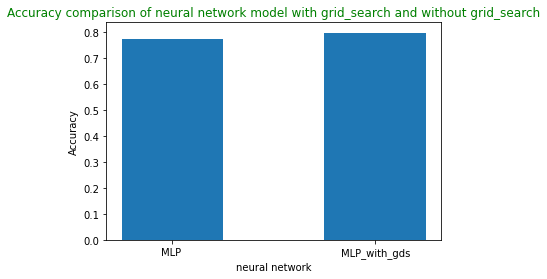

In [61]:
Accuracy=[accuracy_nn,accuracy_nn_gds]
model_name=['MLP ','MLP_with_gds']
plt.bar(model_name,Accuracy, width = 0.5)
plt.xlabel('neural network')
plt.ylabel("Accuracy")
plt.title("Accuracy comparison of neural network model with grid_search and without grid_search", color='green')
plt.show()

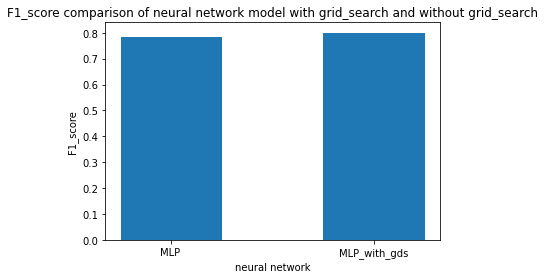

In [62]:
F1_score=[f1_score_nn,f1_score_nn_gds]
model_name=['MLP ','MLP_with_gds']
plt.bar(model_name,F1_score, width = 0.5)
plt.xlabel('neural network')
plt.ylabel("F1_score")
plt.title("F1_score comparison of neural network model with grid_search and without grid_search", color='black')
plt.show()

# Thanks